In [2]:
import pandas as pd
import numpy as np
from dbConn import engine

In [3]:
prices = pd.read_sql_query('select * from NDX_full_1day', con=engine.connect())

In [4]:
len(prices)

5811

In [5]:
prices['PrevClose'] = prices['Close'].shift(1)
prices['OpenGap'] = prices['Open'] - prices['PrevClose']
prices['OpenGapPct'] = prices['OpenGap'] / prices['PrevClose']
prices['Range'] = prices['High'] - prices['Low']
prices['RangePct'] = prices['Range'] / prices['PrevClose']

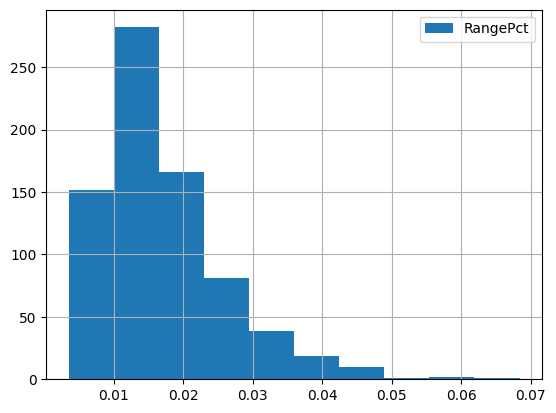

In [6]:
import matplotlib.pyplot as plt
prices.loc[prices['Datetime'].dt.year > 2020, 'RangePct'].hist(legend=True);

In [11]:
prices.loc[prices['Datetime'].dt.year > 2020,'OpenGapPct'].describe()

count    753.000000
mean       0.000142
std        0.008502
min       -0.032866
25%       -0.004254
50%        0.000266
75%        0.004415
max        0.051203
Name: OpenGapPct, dtype: float64

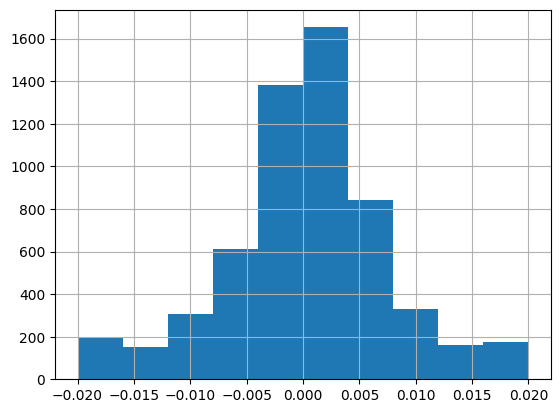

In [17]:
prices['OpenGapPct'].clip(-0.02,0.02).hist();